# Assignment 2: K-means clustering {-}

This assignment aims at familiarizing you with training and testing K-means clustering model. The dataset you will be working on is 'credit-card-holder-data.csv'. It is composed of attributes such as balance of the credit card, ammount of purchase, etc., to develop a customer segmentation model. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the credit-card-holder-data.csv dataset and perform basic data cleaning, analysis and visualization to have a deep understanding about the data.  
    1.2 *(1 point)* Use the Elbow Method and KElbowVisualizer to determine the optimal number of clusters K. Explain your choice.  
    1.3 *(1 point)* Train a K-Means clustering model using the chosen K and interpret the results.  
    1.4 *(1 point)* Apply PCA to reduce the dataset to two and three dimensions. Visualize the clusters and interpret any patterns you observe.  
    1.5 *(1 point)* Select a few samples from each cluster and analyze their features. What characteristics define each cluster?  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Based on your exploration, which features seem most relevant for clustering credit card holders? Were there any features you initially thought were important but turned out not to be?  
    2.2 *(1 point)* Did the Elbow Method give a clear choice for K? If not, what alternative strategies could you have used to determine K?  
    2.3 *(1 point)* After clustering, do the resulting groups make intuitive sense? Can you describe typical characteristics of customers in each cluster?  
    2.4 *(1 point)* How could businesses use customer segmentation from this clustering model? Give an example of a marketing or financial strategy that could be derived from these clusters.  
    2.5 *(1 point)* What ethical concerns should be considered when segmenting customers based on financial behavior? How can companies use this information responsibly?  

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment2-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment2 (e.g., ML4DS-2012345-Assigment2) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you handle the data for training the K-means model, evaluate the model performance, visualize customer clusters and analyze the cluster characteristics. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [2]:
# Load pandas library
import pandas as pd

In [4]:
# Load dataset in pandas dataframe
df = pd.read_csv("credit-card-holder-data.csv")

In [5]:
# Show several
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

## 1. Coding tasks

### 1.1 Exploratory Data Analysis

Dataset Shape: (8950, 17)

Dtypes & Missing Values (top 10):
                          column   dtype  missing
                         BALANCE float64        0
               BALANCE_FREQUENCY float64        0
                       PURCHASES float64        0
                ONEOFF_PURCHASES float64        0
          INSTALLMENTS_PURCHASES float64        0
                    CASH_ADVANCE float64        0
             PURCHASES_FREQUENCY float64        0
      ONEOFF_PURCHASES_FREQUENCY float64        0
PURCHASES_INSTALLMENTS_FREQUENCY float64        0
          CASH_ADVANCE_FREQUENCY float64        0

ID-like columns (dropped from analysis): None detected

Numeric Summary (+ Skew) — first 12 rows:
                                   count      mean       std  min      25%      50%       75%        max    skew
BALANCE                           8950.0  1564.475  2081.532  0.0  128.282  873.385  2054.140  19043.139   2.393
BALANCE_FREQUENCY                 8950.0     0.877     0.237  0.

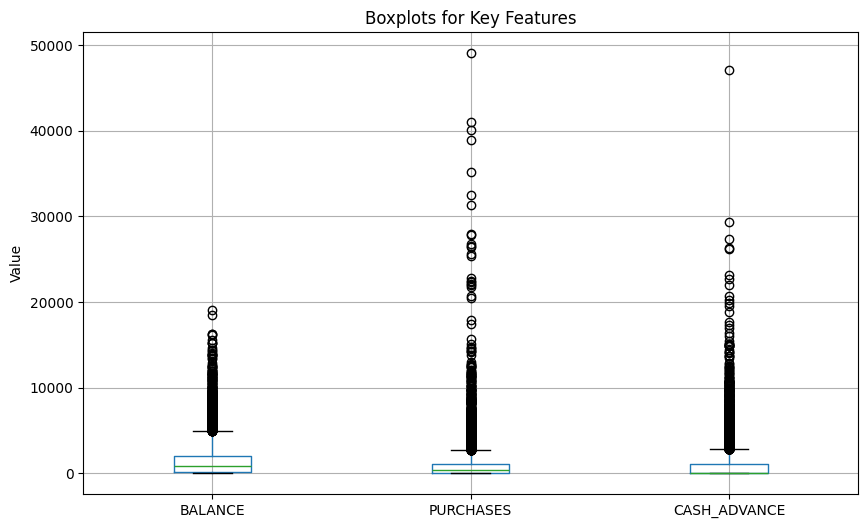

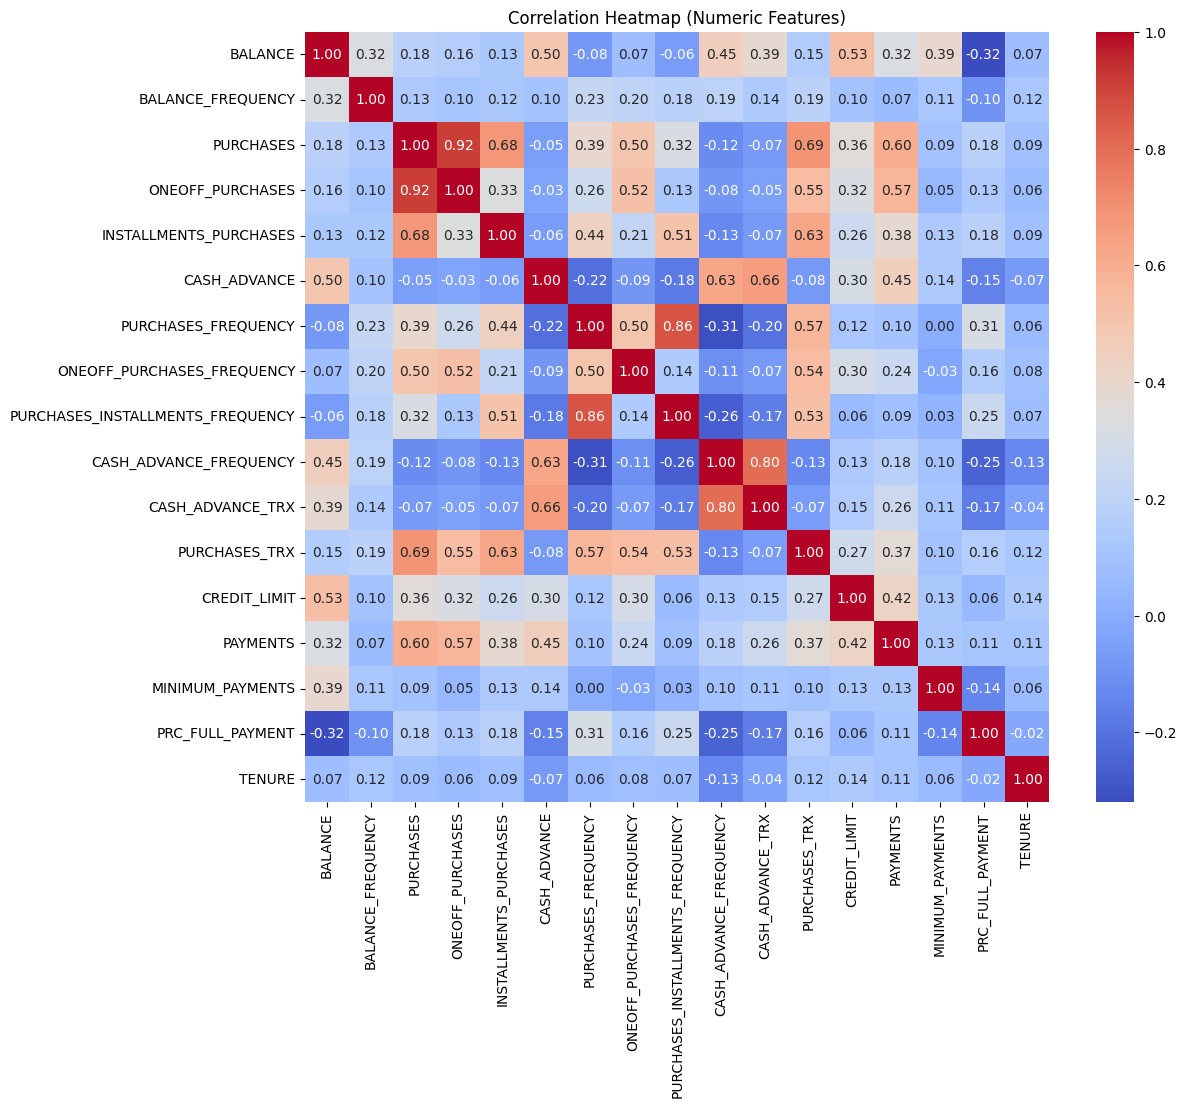

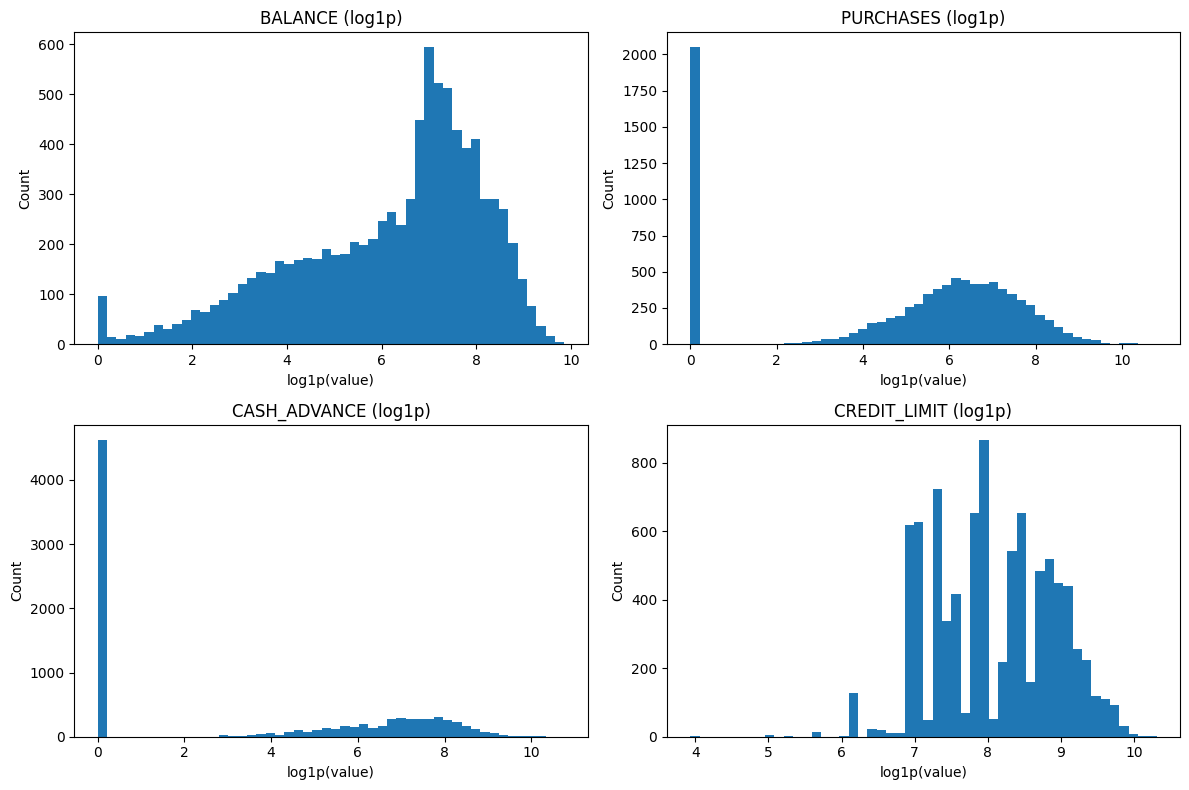

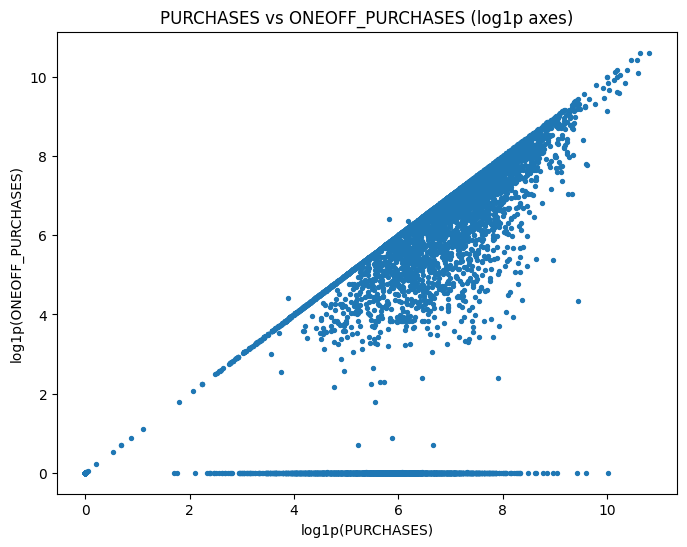

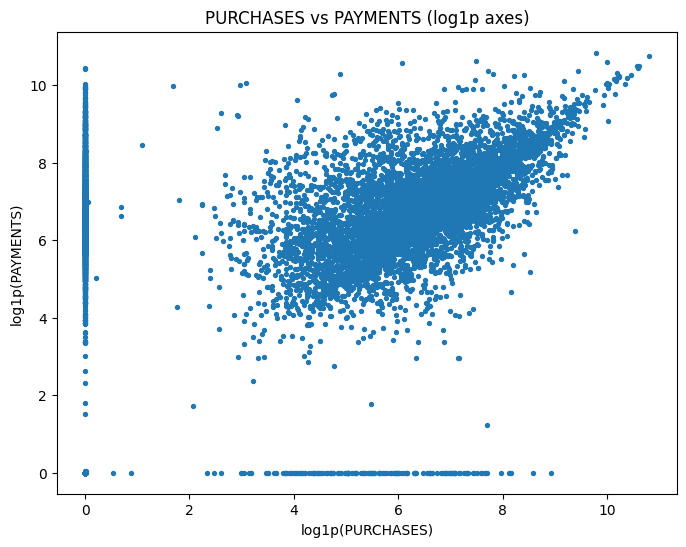

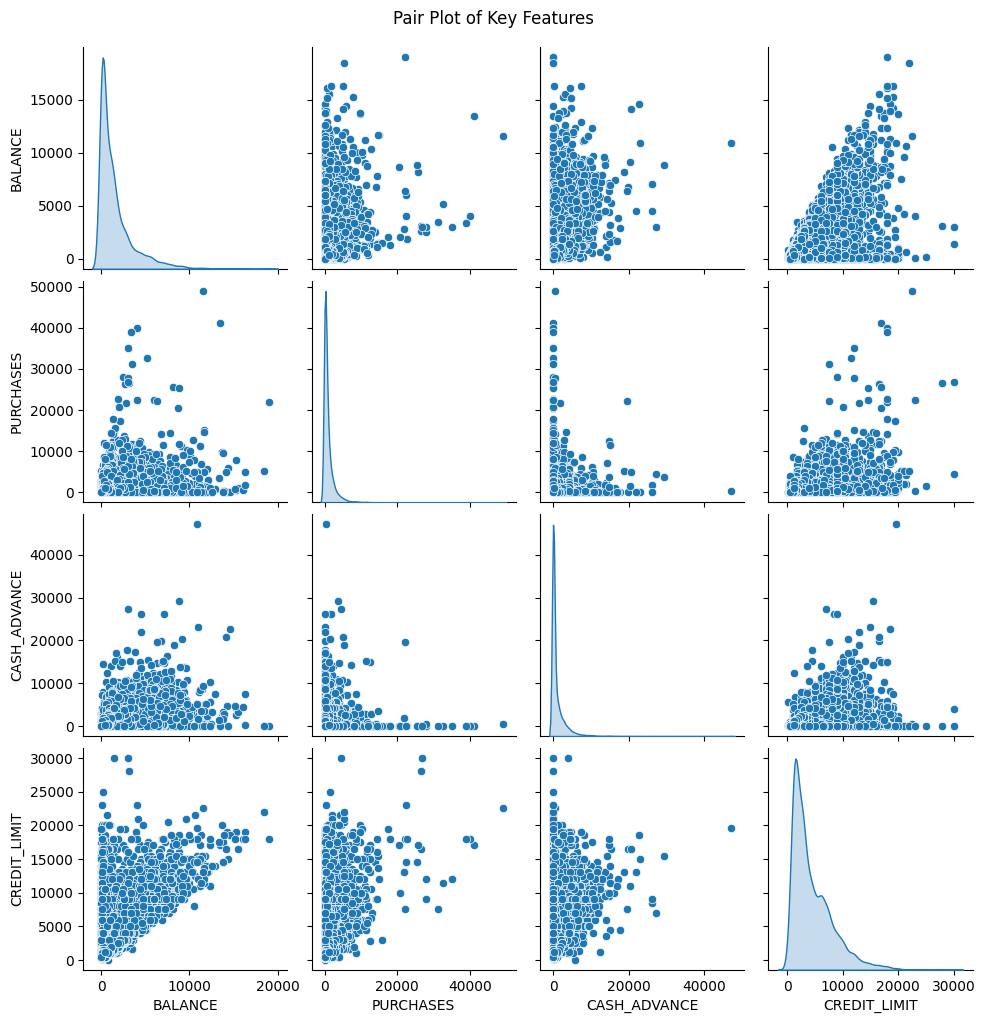

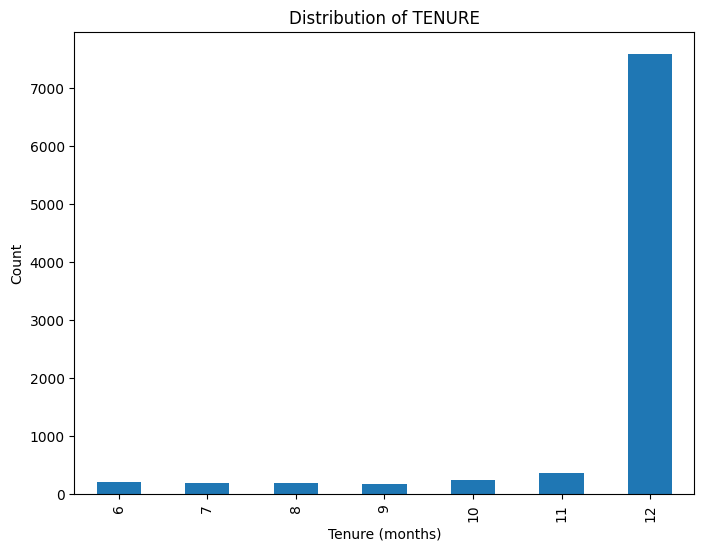

In [8]:
# Load, clean, analysis, visualization
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Structure & Missing Values
def summarize_structure(df):
    """Summarize dataset shape, dtypes, and missing values."""
    print("Dataset Shape:", df.shape)
    dtypes = df.dtypes.astype(str).rename("dtype")
    missing = df.isna().sum().rename("missing")
    overview = (pd.concat([dtypes, missing], axis=1)
                .reset_index()
                .rename(columns={"index": "column"})
                .sort_values("missing", ascending=False))
    print("\nDtypes & Missing Values (top 10):")
    print(overview.head(10).to_string(index=False))

    # Analyze missing value patterns for key columns
    if df['CREDIT_LIMIT'].isna().sum() > 0:
        print("\nRows with missing CREDIT_LIMIT (summary):")
        print(df[df['CREDIT_LIMIT'].isna()][['BALANCE', 'PURCHASES', 'CASH_ADVANCE']].describe().round(3))
    if df['MINIMUM_PAYMENTS'].isna().sum() > 0:
        print("\nRows with missing MINIMUM_PAYMENTS (summary):")
        print(df[df['MINIMUM_PAYMENTS'].isna()][['BALANCE', 'PURCHASES', 'CASH_ADVANCE']].describe().round(3))

summarize_structure(df)

# ---------- Detect ID-like Columns & Coerce Numeric-like Text ----------
def detect_id_columns(df, unique_threshold=0.5):
    """Detect ID-like columns based on uniqueness or specific names."""
    id_cols = []
    for col in df.columns:
        if df[col].dtype == "object":
            if df[col].nunique(dropna=True) > unique_threshold * len(df):
                id_cols.append(col)
            else:
                coerced = pd.to_numeric(df[col], errors="coerce")
                if coerced.notna().mean() >= 0.90:
                    df[col] = coerced
                else:
                    id_cols.append(col)
    for cand in ["CUST_ID", "ID", "CustomerID", "Cust_ID"]:
        if cand in df.columns and cand not in id_cols:
            id_cols.append(cand)
    return id_cols

numeric_df = df.copy()
id_columns = detect_id_columns(numeric_df)
print("\nID-like columns (dropped from analysis):", id_columns if id_columns else "None detected")

# ---------- Numeric Analysis View ----------
numeric_df = numeric_df.drop(columns=id_columns, errors="ignore").select_dtypes(include=[np.number])
numeric_df_imputed = numeric_df.fillna(numeric_df.median(numeric_only=True))  # For charts/corr only

# ---------- Numeric Summary with Skewness and Zero Proportions ----------
def summarize_numeric(df, cols_to_check_zeros=None):
    """Summarize numeric features with stats, skewness, and zero proportions."""
    desc = df.describe().T
    desc["skew"] = df.skew(numeric_only=True)
    print("\nNumeric Summary (+ Skew) — first 12 rows:")
    print(desc.head(12).round(3).to_string())

    if cols_to_check_zeros:
        print("\nProportion of Zero Values:")
        for col in cols_to_check_zeros:
            zero_prop = (df[col] == 0).mean()
            print(f"{col}: {zero_prop:.3f}")

summarize_numeric(numeric_df_imputed, ['PURCHASES', 'CASH_ADVANCE', 'INSTALLMENTS_PURCHASES'])

# ---------- Outlier Detection ----------
def detect_outliers(series, threshold=3):
    """Detect outliers using z-scores."""
    z_scores = np.abs((series - series.mean()) / series.std())
    return series[z_scores > threshold]

print("\nOutlier Counts (>3 std):")
for col in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']:
    outliers = detect_outliers(numeric_df_imputed[col])
    print(f"{col}: {len(outliers)}")

# ---------- Visualizations ----------
# Boxplots for outliers
plt.figure(figsize=(10, 6))
numeric_df_imputed[['BALANCE', 'PURCHASES', 'CASH_ADVANCE']].boxplot()
plt.title('Boxplots for Key Features')
plt.ylabel('Value')
plt.show()

# Correlation Heatmap (Seaborn)
corr = numeric_df_imputed.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# Combined Histograms (log1p)
def plot_histograms(df, cols, title):
    """Plot combined histograms with log1p transformation."""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    for ax, col in zip(axes.flat, cols):
        ax.hist(np.log1p(df[col].dropna()), bins=50)
        ax.set_title(f'{col} (log1p)')
        ax.set_xlabel('log1p(value)')
        ax.set_ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_histograms(numeric_df_imputed, ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT'], "Histograms of Key Features")

# Scatter Plots (log1p axes)
def scatter_log1p(x, y, title):
    """Plot scatter plot with log1p-transformed axes."""
    plt.figure(figsize=(8, 6))
    plt.scatter(np.log1p(x), np.log1p(y), s=8)
    plt.title(title + " (log1p axes)")
    plt.xlabel(f"log1p({x.name})")
    plt.ylabel(f"log1p({y.name})")
    plt.show()

scatter_log1p(
    numeric_df_imputed['PURCHASES'],
    numeric_df_imputed['ONEOFF_PURCHASES'],
    'PURCHASES vs ONEOFF_PURCHASES'
)

scatter_log1p(
    numeric_df_imputed['PURCHASES'],
    numeric_df_imputed['PAYMENTS'],
    'PURCHASES vs PAYMENTS'
)

# Pair Plot for Key Features
sns.pairplot(numeric_df_imputed[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

# Tenure Distribution
plt.figure(figsize=(8, 6))
numeric_df_imputed['TENURE'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of TENURE')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

For EDA, I first define a function to summarize the structure of the dataset to learn about the overall structure such as if there is any missing column, then I preprocess the data by removing ID-like columns and impute missing values with medians (This code chunk is unnecessary here because there are no missing values but I still want to include this step).

In the next step, outliers are detected using z-scores and visualized with boxplots, while distributions and relationships are explored through log1p-transformed histograms, scatter plots, a seaborn correlation heatmap, a pair plot, and a tenure bar plot.

-> This EDA identifies key patterns, such as inactive users and skewed financial behaviors, critical for customer segmentation.

### 1.2 Elbow Method and KElbowVisualizer

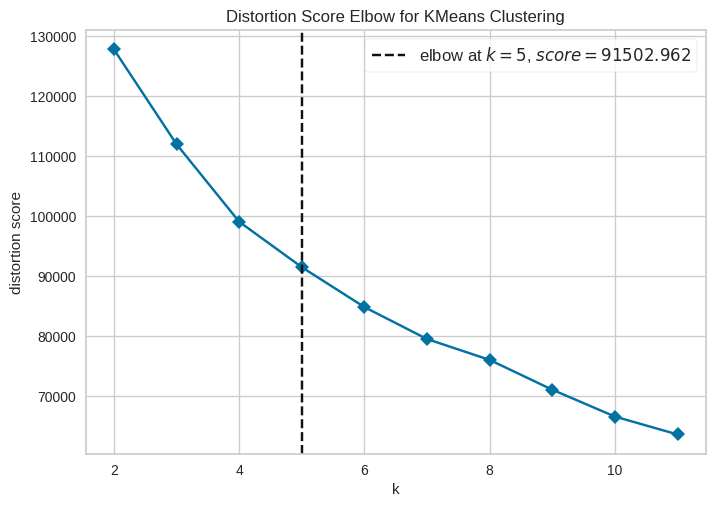

Suggested optimal K: 5


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df_imputed)

def plot_elbow_method(data, k_range=(2, 12)):
    """Plot Elbow curve to determine optimal K for K-means clustering."""
    model = KMeans(random_state=42, n_init=10)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False, metric='distortion')
    visualizer.fit(data)
    plt.title('Elbow Method for Optimal K')
    visualizer.show()
    print(f"Suggested optimal K: {visualizer.elbow_value_}")

plot_elbow_method(scaled_data)

For the model, I standardized the dataset before running K-Means, because the features had very different scales (for example, CREDIT_LIMIT in the tens of thousands vs. PURCHASES_FREQUENCY under 1).

Then, I test K values from 2 to 12 to find where the inertia curve starts to flatten (the elbow) and visualize it.

In the plot, the elbow is around K = 5. I also chose K=5 because it does make sense to this dataset. My guess is that the customer types might include some segments such as: inactive users, frequent purchasers, installment payers, cash-advance users, and high spenders.

Therefore, choosing K = 5 helps me guarantee simplicity with meaningful segmentation and reflects how the inertia drops sharply until that point before leveling off.


### 1.3 Train a K-Means clustering model with $K=5$

In [21]:
def train_kmeans(data, k=5):
    """Train K-means model and return labels and centroids."""
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    return labels, centroids, kmeans

# Train model
labels, centroids, kmeans = train_kmeans(scaled_data)

# Add labels to DataFrame
clustered_df = numeric_df_imputed.copy()
clustered_df['Cluster'] = labels

# Centroids in original scale
centroids_df = pd.DataFrame(centroids, columns=numeric_df_imputed.columns)
print("Cluster Centroids (Original Scale):")
print(centroids_df.round(3).to_string())

# Cluster means
print("\nCluster Means:")
print(clustered_df.groupby('Cluster').mean().round(3).to_string())

# Inertia
print(f"\nK-Means Inertia: {kmeans.inertia_:.2f}")

Cluster Centroids (Original Scale):
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
0  1050.825              0.797    278.860           225.791                  53.271       619.459                0.163                       0.097                             0.066                   0.119             2.206          2.950      3342.620   1005.659           589.902             0.071  11.455
1   645.729              0.902    797.853           166.799                 631.548       178.023                0.856                       0.083                             0.794                   0.038             0.709         16.646      3198.843    935.254           683.767             0.272  11.455
2  4541.394              0.977  15777.311  

**Interpretation:**

**Cluster 0 – Low Usage Customers**

* Low balances and small purchases
* Rarely use their cards (low purchase frequency)
* Low full payment ratio and small credit limits

-> Occasional or inactive users

**Cluster 1 – Regular Installment Users**

* Moderate balances and purchases
* Frequent use, prefer installment payments
* Low cash advance usage and good payment habits

-> Responsible, steady users

**Cluster 2 – High Spenders / Full Payers**

* Very high purchases and balances
* Frequent one-off and installment spending
* High credit limits, large payments, often pay in full

-> Affluent, high-value customers

**Cluster 3 – Cash Advance Users**
* High balances but low purchases
* Heavy cash advance usage and low full payment ratio
* High minimum payments

-> Credit-dependent or risk-prone customers

**Cluster 4 – Active Balanced Spenders**
* High purchases with moderate balances
* Frequent card use (both one-off and installments)
* Low cash advance usage, consistent payments

→ Active, balanced card users

### 1.4 PCA and Visualization

Explained Variance Ratio (2D): 0.476


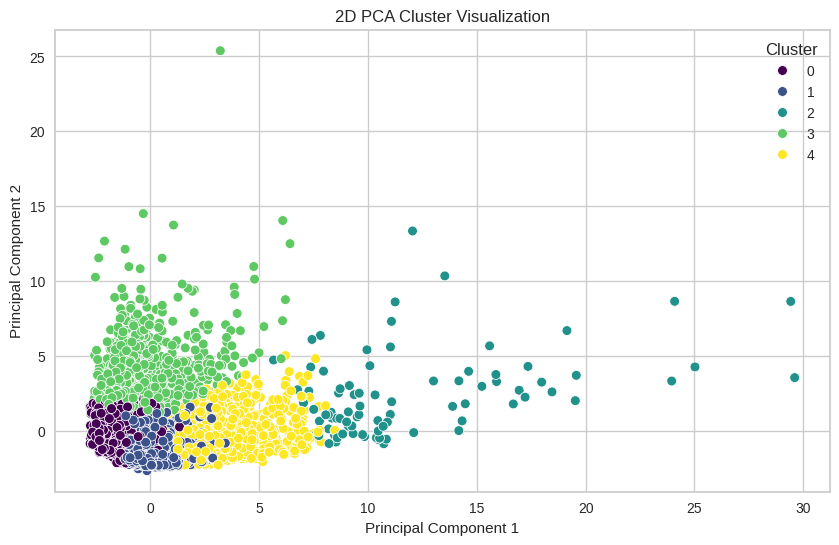

Explained Variance Ratio (3D): 0.564


In [22]:
from sklearn.decomposition import PCA
import plotly.express as px

def apply_pca_and_visualize(data, labels, n_components=2):
    """Apply PCA and visualize clusters in 2D or 3D."""
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(data)
    pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['Cluster'] = labels

    # Explained variance
    print(f"Explained Variance Ratio ({n_components}D): {pca.explained_variance_ratio_.sum():.3f}")

    if n_components == 2:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=50)
        plt.title('2D PCA Cluster Visualization')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()
    else:
        fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster',
                           title='3D PCA Cluster Visualization')
        fig.update_traces(marker=dict(size=5))
        fig.show()

# 2D PCA
apply_pca_and_visualize(scaled_data, labels, n_components=2)

# 3D PCA
apply_pca_and_visualize(scaled_data, labels, n_components=3)

**Interpretation**

**1. General Pattern**

* The 2D and 3D PCA plots show 5 distinct clusters with small overlaps at the edges.-> Customers display different spending, balance, and payment behaviors.
* The first two components explain **47.6%** of the variance, while three components explain **56.4%** -> good overall representation.


**2. 2D PCA Plot**

* Most clusters are well separated, though a few customers sit near the boundaries.
* Each cluster forms a clear group, reflecting different customer types.

  * **Cluster 0:** Low spenders (rarely use their cards.)
  * **Cluster 1:** Regular installment users (steady, frequent buyers.)
  * **Cluster 2:** High spenders/full payers (large purchases and high limits.)
  * **Cluster 3:** Cash advance users (rely heavily on credit withdrawals.)
  * **Cluster 4:** Active balanced spenders (frequent use, low risk.)


**3. 3D PCA Plot**

* Adding a third component increases variance to **56.4%** -> improve separation.
* Clusters -> distinct 3D blobs -> clear differences in card usage and payment behavior.
* High-spending and cash-advance groups spread wider -> greater behavioral diversity.


**4. Overall Insight**

* The PCA visualization confirms that **K=5** is a suitable choice.
* Each cluster represents a meaningful customer segment with unique financial behavior.
* The small overlaps between groups show natural transitions between moderate and high spenders, while most customers fit neatly within their assigned cluster.

### 1.5 : Sample Analysis and Cluster Characteristics

In [23]:
def analyze_cluster_samples(df, n_samples=5):
    """Analyze samples and mean features for each cluster."""
    for cluster in range(df['Cluster'].nunique()):
        print(f"\nCluster {cluster} Samples ({n_samples} random):")
        samples = df[df['Cluster'] == cluster].sample(n_samples, random_state=42)
        print(samples.round(3).to_string())

        print(f"\nCluster {cluster} Mean Features:")
        print(df[df['Cluster'] == cluster].mean().round(3).to_string())

analyze_cluster_samples(clustered_df)


Cluster 0 Samples (5 random):
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster
4738   996.223              1.000       0.00              0.00                    0.00      1398.396                0.000                       0.000                             0.000                   0.083                 1              0        8000.0  2369.168           226.017               0.0      12        0
6425   538.769              0.909     226.95            129.58                   97.37       452.009                0.545                       0.091                             0.455                   0.273                 8              9        1200.0   946.649           211.220               0.0      11        0
968   2802.369 

The sample exhibits patterns similar to what I interpreted above, which reinforce K=5. In detail:

The five clusters show clear behavioral differences based on spending, payment, and cash usage patterns:

Cluster 0 – Low Usage Customers: Rarely use their cards, have low balances and payments. Mostly inactive users with minimal risk or profit.

Cluster 1 – Regular Installment Users: Steady spenders who prefer installments, pay regularly, and show responsible usage.

Cluster 2 – High Spenders / Full Payers: Affluent customers with high purchases, strong repayment habits, and high credit limits.

Cluster 3 – Cash Advance Users: Depend heavily on cash advances, make few purchases, and pay mostly minimum amounts — higher credit risk.

Cluster 4 – Active Balanced Spenders: Frequent, balanced users who mix one-off and installment purchases and pay consistently.



## 2. Open discussion questions

### 2.1

The most relevant features for clustering credit card holders are **PURCHASES**, **CASH_ADVANCE**, **BALANCE**, **PURCHASES_FREQUENCY**, **CASH_ADVANCE_FREQUENCY**, and **CREDIT_LIMIT**, as they clearly reflect customer spending behavior and credit usage patterns.

Observing the bar chart I added below, we can see that **Cluster 2** has the highest **PURCHASES** and **CREDIT_LIMIT**, showing high-value spenders who use their cards frequently. **Cluster 3** stands out with very high **CASH_ADVANCE**, indicating customers who rely heavily on cash withdrawals rather than purchases. Meanwhile, **Clusters 0 and 1** have low to moderate values across most features, representing low or average users.

These differences confirm that spending and cash-related features drive most of the separation between groups.

On the other hand, **TENURE** remains almost constant across clusters, contributing little to distinguishing behaviors. Although I initially expected it to reflect customer loyalty, its low variance (mostly 12 months) and weak correlations show it had minimal influence on the clustering results.


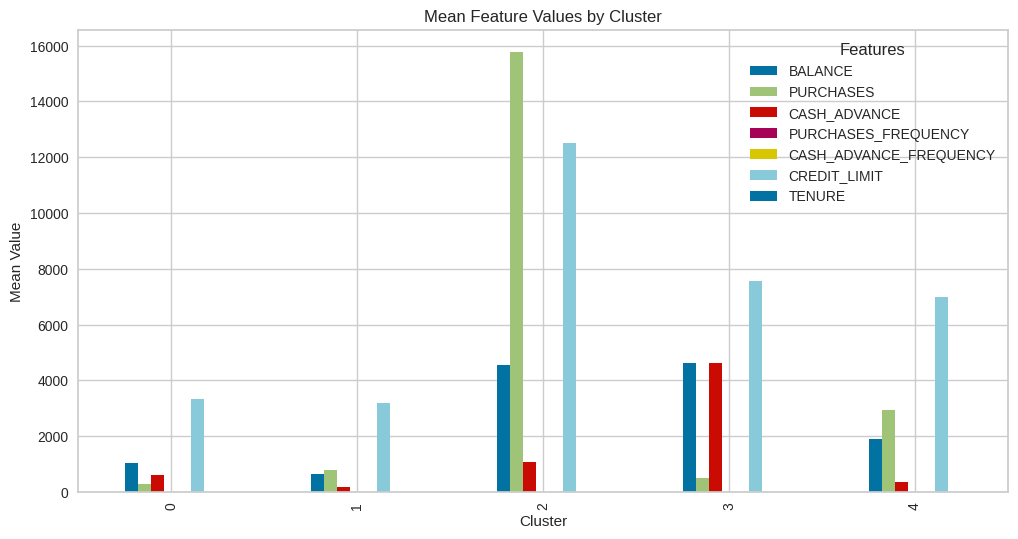

In [24]:
cluster_means = clustered_df.groupby('Cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE',
                                                'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                                                'CREDIT_LIMIT', 'TENURE']].mean()
cluster_means.plot(kind='bar', figsize=(12, 6), title='Mean Feature Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Features')
plt.show()

### 2.2

The Elbow Method using the **KElbowVisualizer** suggested that **K = 5** might be a reasonable choice, as the inertia curve began to flatten around this point, indicating diminishing returns from adding more clusters. However, the change between **K = 4** and **K = 5** wasn’t very pronounced, so this decision could vary slightly depending on the dataset or initialization. If the elbow point were unclear, methods such as the **Silhouette score** or **Gap statistic** could be used to provide additional evidence, and **hierarchical clustering** with a dendrogram might also help visualize a suitable number of clusters.


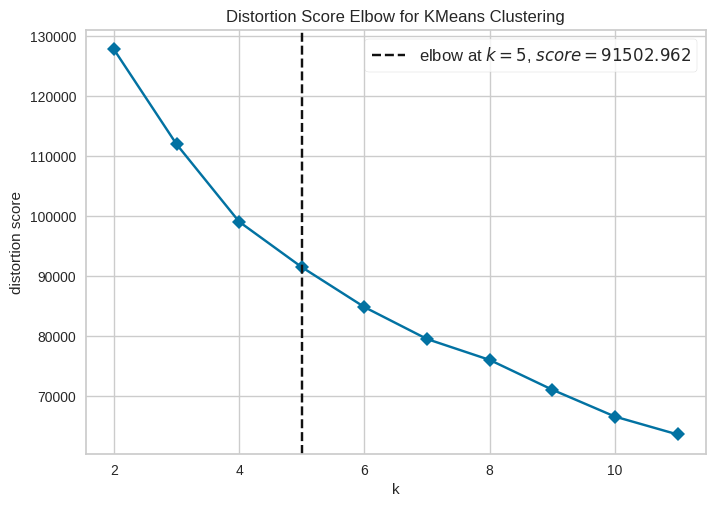

### 2.3

Yes, the resulting clusters make intuitive sense and align well with common credit card user behaviors. Each group shows clear patterns: **Cluster 0** represents low-usage customers who rarely use their cards; **Cluster 1** includes regular installment users with steady, moderate spending; **Cluster 2** consists of high spenders who often pay their balances in full; **Cluster 3** captures cash-advance users who rely on credit withdrawals; and **Cluster 4** features active, balanced spenders who use their cards frequently but manage payments responsibly. Overall, the clusters reflect realistic customer segments with distinct spending and repayment habits.


### 2.4

**1. Targeted Marketing Campaigns**

* Offer tailored promotions; for example, **cashback or reward points** for active spenders (Clusters 2 and 4) to encourage continued use.

**2. Credit Risk Management**

* Monitor **cash-advance users (Cluster 3)** more closely, as their heavy reliance on credit may indicate higher default risk.

**3. Customer Retention Programs**

* Provide **engagement incentives** (like annual fee waivers or low-interest offers) for **inactive customers (Cluster 0)** to reactivate usage.

**4. Product Personalization**

* Design **installment-based plans or flexible payment options** for **regular users (Cluster 1)** who prefer consistent, manageable spending.

**5. Premium Services and Upselling**

* Offer **premium cards, higher credit limits, or travel benefits** to **high-value customers (Cluster 2)** who make large payments and use their cards frequently.



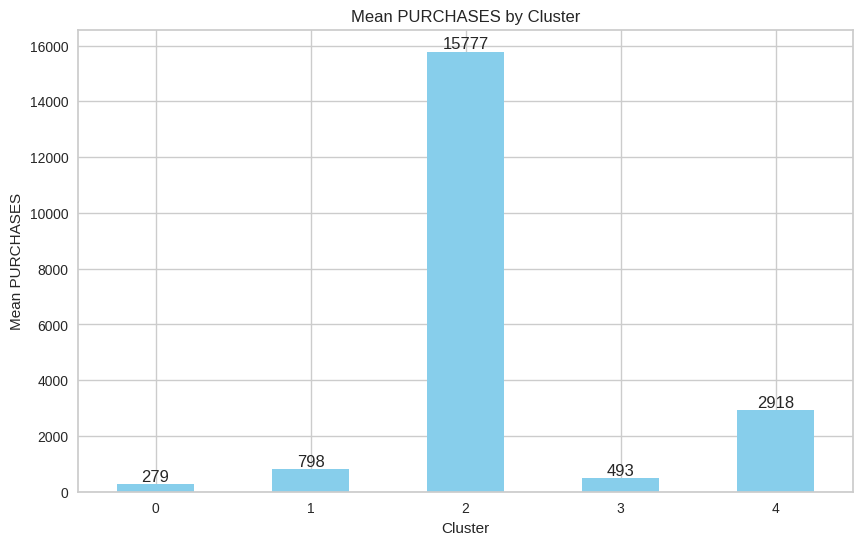

In [26]:
purchases_by_cluster = clustered_df.groupby('Cluster')['PURCHASES'].mean()
purchases_by_cluster.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Mean PURCHASES by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean PURCHASES')
plt.xticks(rotation=0)
for i, v in enumerate(purchases_by_cluster):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')
plt.show()

### 2.5

When segmenting customers based on financial behavior, companies must prioritize ethics, fairness, and transparency. Customer data should be collected and analyzed responsibly, with proper consent and strong privacy protections. Segmentation should never lead to discrimination or unfair treatment, such as denying opportunities or targeting vulnerable groups like heavy cash-advance users with harmful credit offers. Instead, businesses should use these insights to promote financial well-being—offering tailored budgeting tools, repayment support, or personalized rewards that genuinely benefit customers. Overall, the goal should be to balance business objectives with responsible data use, ensuring segmentation helps customers rather than exploits them.